# Лабораторная работа №3. Федоров Н.А.
# Вариант 11 - poker
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных
1. Suit of card #n - Масть карты
    * 1 - Черви
    * 2 - Пики
    * 3 - Буби
    * 4 - Крести
2. Rank of card #n - Ранг карты
    * 1 - Туз
    * 2 - Два
    * .......
    * 12 - Дама
    * 13 - Король
3. Poker Hand - Покерная комбинация
    * 0: Ничего в руке: нет комбинаций
    * 1: Одна пара: одна пара равных рангов в пределах пяти карт
    * 2: Две пары: две пары равных рангов в пределах пяти карт
    * 3: Сет: три карты равных рангов в пределах пяти карт
    * 4: Стрит: пять карт, последовательно ранжированных без пробелов
    * 5: Флэш: пять карт одной масти
    * 6: Фулл Хаус: пара + сет
    * 7: Каре: четыре карты равных рангов в пределах пяти карт
    * 8: Стрит Флэш: Стрит + Флэш
    * 9: Флэш-Рояль: туз, король, дама, валет, десятка одной масти



In [1]:
import pandas as pd
poker_df = pd.read_csv('poker-hand-training-true.data.txt')
poker_df.columns = ['Suit_of_card_#1', 'Rank_of_card_#1',
                    'Suit_of_card_#2', 'Rank_of_card_#2',
                    'Suit_of_card_#3', 'Rank_of_card_#3',
                    'Suit_of_card_#4', 'Rank_of_card_#4',
                    'Suit_of_card_#5', 'Rank_of_card_#5', 
                    'Poker_Hand']
poker_df

,Suit_of_card_#1,Rank_of_card_#1,Suit_of_card_#2,Rank_of_card_#2,Suit_of_card_#3,Rank_of_card_#3,Suit_of_card_#4,Rank_of_card_#4,Suit_of_card_#5,Rank_of_card_#5,Poker_Hand
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


In [2]:
print("До удаления дубликатов:    ", poker_df.index.size)
poker_df.drop_duplicates(keep = 'first', inplace = True)
print("После удаления дубликатов: ", poker_df.index.size)

До удаления дубликатов:     25009
После удаления дубликатов:  25007


# 3. Оцените сбалансированность данных по классам (постройте гистограмму).

<AxesSubplot:xlabel='Poker_Hand', ylabel='count'>

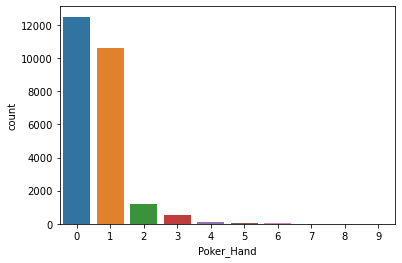

In [3]:
import seaborn
seaborn.countplot(x='Poker_Hand', data=poker_df)

# 4. Выполните масштабирование количественных признаков, постройте диаграммы BoxPlot для признаков до и после масштабирования.

In [4]:
from sklearn.preprocessing import MinMaxScaler

numericDF = poker_df.drop('Poker_Hand', axis = 1)
numericDF

,Suit_of_card_#1,Rank_of_card_#1,Suit_of_card_#2,Rank_of_card_#2,Suit_of_card_#3,Rank_of_card_#3,Suit_of_card_#4,Rank_of_card_#4,Suit_of_card_#5,Rank_of_card_#5
0,2,11,2,13,2,10,2,12,2,1
1,3,12,3,11,3,13,3,10,3,1
2,4,10,4,11,4,1,4,13,4,12
3,4,1,4,13,4,12,4,11,4,10
4,1,2,1,4,1,5,1,3,1,6
...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4
25005,4,1,4,10,3,13,3,4,1,10
25006,2,1,2,10,4,4,4,1,4,13
25007,2,12,4,3,1,10,1,12,4,9


BoxPlot до масштабирования:


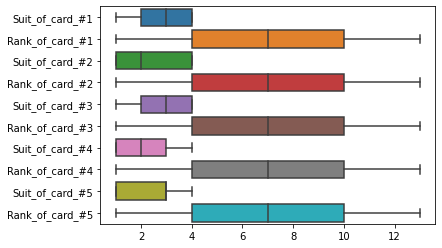

In [5]:
seaborn.boxplot(data = numericDF, orient = 'h')
print('BoxPlot до масштабирования:')

BoxPlot после масштабирования:


<AxesSubplot:>

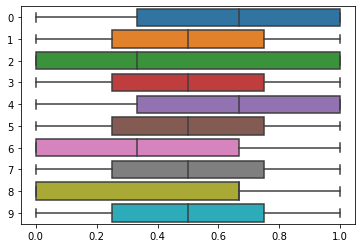

In [6]:
# Выполняем нормализацию данных
scaler = MinMaxScaler()
scaler.fit(numericDF)
numericDF = scaler.transform(numericDF)

print('BoxPlot после масштабирования:')
seaborn.boxplot(data = numericDF, orient = 'h')

# 5. Выполните замену категориальных признаков

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
new_ohe_features = ohe.fit_transform(poker_df.Poker_Hand.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=['Poker_Hand=' + str(i) for i in range(new_ohe_features.shape[1])])
poker_df1 = pd.concat([poker_df, tmp], axis=1)
poker_df1.drop('Poker_Hand', axis = 1, inplace = True)
poker_df1.dropna(how = 'any', inplace = True)
poker_df1

,Suit_of_card_#1,Rank_of_card_#1,Suit_of_card_#2,Rank_of_card_#2,Suit_of_card_#3,Rank_of_card_#3,Suit_of_card_#4,Rank_of_card_#4,Suit_of_card_#5,Rank_of_card_#5,Poker_Hand=0,Poker_Hand=1,Poker_Hand=2,Poker_Hand=3,Poker_Hand=4,Poker_Hand=5,Poker_Hand=6,Poker_Hand=7,Poker_Hand=8,Poker_Hand=9
0,2.0,11.0,2.0,13.0,2.0,10.0,2.0,12.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,12.0,3.0,11.0,3.0,13.0,3.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.0,10.0,4.0,11.0,4.0,1.0,4.0,13.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,4.0,13.0,4.0,12.0,4.0,11.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,2.0,1.0,4.0,1.0,5.0,1.0,3.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25002,1.0,12.0,2.0,9.0,2.0,12.0,4.0,8.0,1.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25003,3.0,5.0,3.0,7.0,4.0,11.0,3.0,11.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25004,3.0,9.0,2.0,6.0,4.0,11.0,4.0,12.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25005,4.0,1.0,4.0,10.0,3.0,13.0,3.0,4.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

In [8]:
correlation_df = poker_df.corr()
# correlation_df

<AxesSubplot:>

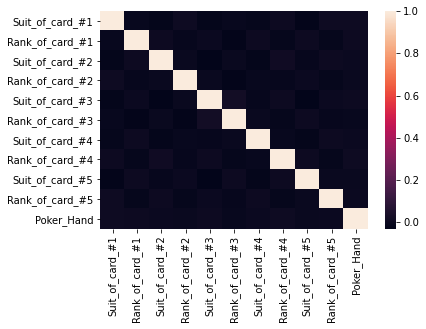

In [9]:
seaborn.heatmap(correlation_df)

# 7. Заполните пропущенные значения в данных;

In [10]:
poker_df.isnull().sum()
# Пропущенных значений нет

Suit_of_card_#1    0
Rank_of_card_#1    0
Suit_of_card_#2    0
Rank_of_card_#2    0
Suit_of_card_#3    0
Rank_of_card_#3    0
Suit_of_card_#4    0
Rank_of_card_#4    0
Suit_of_card_#5    0
Rank_of_card_#5    0
Poker_Hand         0
dtype: int64

# 8. Решите поставленную задачу классификации в соответствии с заданием.

In [11]:
from sklearn.model_selection import train_test_split

# x_data, y_data = poker_df1.drop(columns=['Poker_Hand=0', 'Poker_Hand=1', 'Poker_Hand=2', 'Poker_Hand=3', 'Poker_Hand=4', 'Poker_Hand=5', 'Poker_Hand=6', 'Poker_Hand=7', 'Poker_Hand=8', 'Poker_Hand=9'], axis=1).values, poker_df1['Poker_Hand=9'].values

# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

x = poker_df1.drop(columns=['Poker_Hand=0', 'Poker_Hand=1', 'Poker_Hand=2', 'Poker_Hand=3', 'Poker_Hand=4', 'Poker_Hand=5', 'Poker_Hand=6', 'Poker_Hand=7', 'Poker_Hand=8', 'Poker_Hand=9'], axis=1)
y = poker_df1['Poker_Hand=0']

# Делим базу на тестову выборку и обучающую..
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Классификатор K ближайших соседей (задаётся количество ближайших объектов)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc

knn = KNeighborsClassifier()

# Для подбора параметров классификатора используем метод GridSearchCV 
search = GridSearchCV(knn, {'n_neighbors': [x for x in range(1, 50)]})
# Данные трен. выборки
search.fit(x_train, y_train)
n = search.best_estimator_.n_neighbors
best = search.best_score_
# Создание модели knn по оптимальным данным
knn = KNeighborsClassifier(n_neighbors=n)
# Тренировка 
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print('best:', best)
print("accuracy:", accuracy_score(y_test, knn_predict))

best: 0.5401419145213697
accuracy: 0.5480903819236153


#### Логический классификатор 

In [13]:
import numpy as np
import warnings

from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

dtc = DecisionTreeClassifier()
params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (x_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(x_train, y_train)
accuracy_score  = np.mean(y_test == dtc.predict(x_test))
print(' best:', best_score, "\n", 'at features number:', best_features, "\n", 'at depth:', best_depth)
print(' Accuracy dtc: %.5f' % accuracy_score)

 best: 0.533293551612097 
 at features number: 10 
 at depth: 8
 Accuracy dtc: 0.52669


# 9. Сравните кривые для классификаторов

In [14]:
y_test_inversion = [1-y for y in y_test]

prob_knn = knn.predict_proba(x_test)
prob_dtc = dtc.predict_proba(x_test)

### PR-Кривые

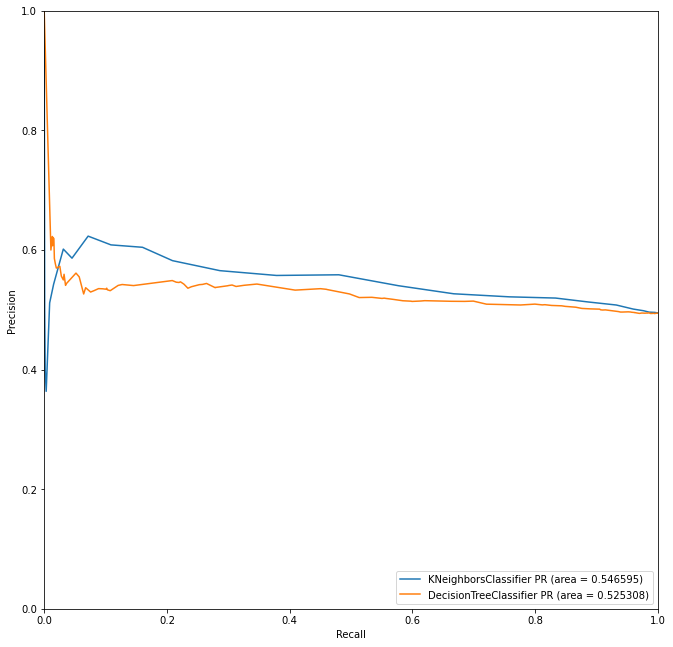

In [15]:
import matplotlib.pyplot as plt

def PR(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))


plt.figure(figsize=(11,11))

PR(prob_knn, 0, 'KNeighborsClassifier', y_test_inversion)
PR(prob_dtc, 0, 'DecisionTreeClassifier', y_test_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()



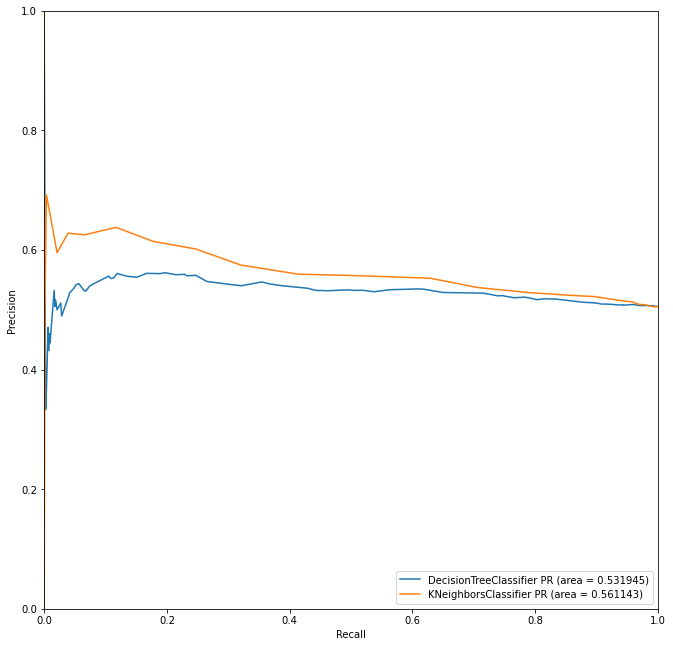

In [16]:
plt.figure(figsize=(11,11))

PR(prob_dtc, 1, 'DecisionTreeClassifier', y_test)
PR(prob_knn, 1, 'KNeighborsClassifier', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

### ROC-Кривые

In [17]:
def ROC0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def ROC1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

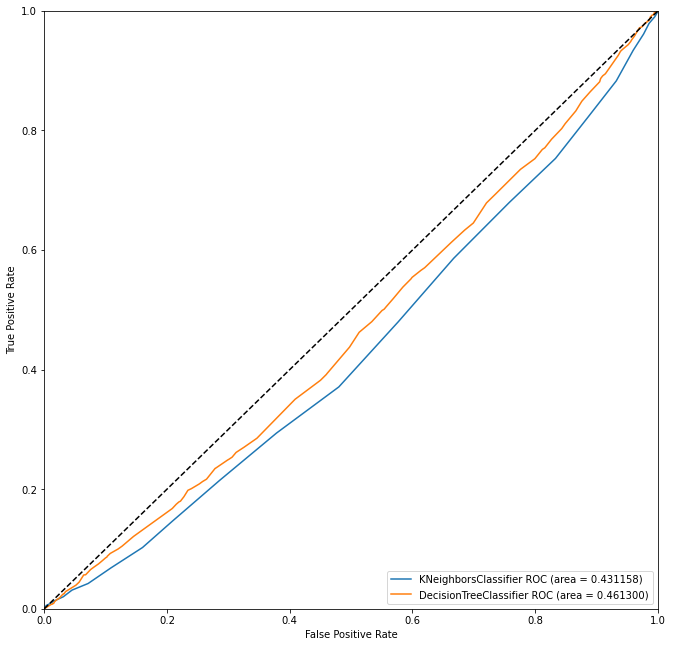

In [18]:
plt.figure(figsize=(11,11))

ROC0(prob_knn, 'KNeighborsClassifier', y_test_inversion)
ROC0(prob_dtc, 'DecisionTreeClassifier', y_test_inversion)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

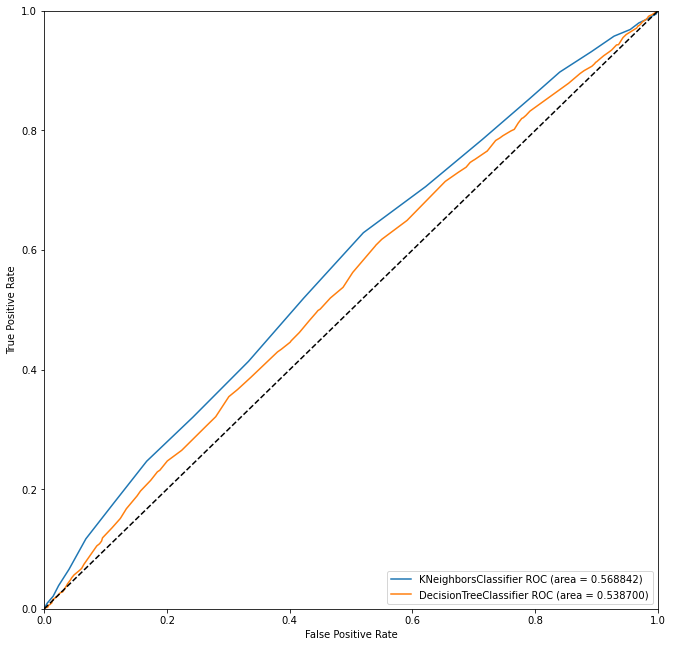

In [19]:
plt.figure(figsize=(11,11))

ROC1(prob_knn, 'KNeighborsClassifier', y_test)
ROC1(prob_dtc, 'DecisionTreeClassifier', y_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

Классификаторы имеют примерно одинаковые показатели качества (примерно = 0.5) относительно PR и ROC кривых.